<a href="https://colab.research.google.com/github/Priti0427/Transaction_Fraud_Detection/blob/main/Copy_of_Fraud_Detection_Aggregated_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Fraud Detection using ML Pipeline

In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.5 MB/s eta 0:00:00


In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the dataset
data_url = "https://drive.google.com/uc?export=download&confirm=6gh6&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV" #taking dataset directly from given link
data = pd.read_csv(data_url)
df = data.copy()

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


#Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.shape

(6362620, 11)

In [8]:
# Checking missing values
df.isnull().sum().sum()

0

In [9]:
# Number of unique values in columns
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [10]:
df["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [11]:
#Feature Selection using Decision Tree Algorithm
df_encoded = df.copy()



In [12]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
data = df.copy(deep = True)
# Get all categorical columns in the dataframe
catCols = [col for col in data.columns if data[col].dtype=="O"]

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for item in catCols:
    data[item] = lb_make.fit_transform(data[item])

In [13]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,4,181.00,181.00,0.00,0.00,0.00,1,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,1,0


In [14]:
df = data.copy()

# Feature Engineering

In [15]:
correlation_matrix = df.corr()

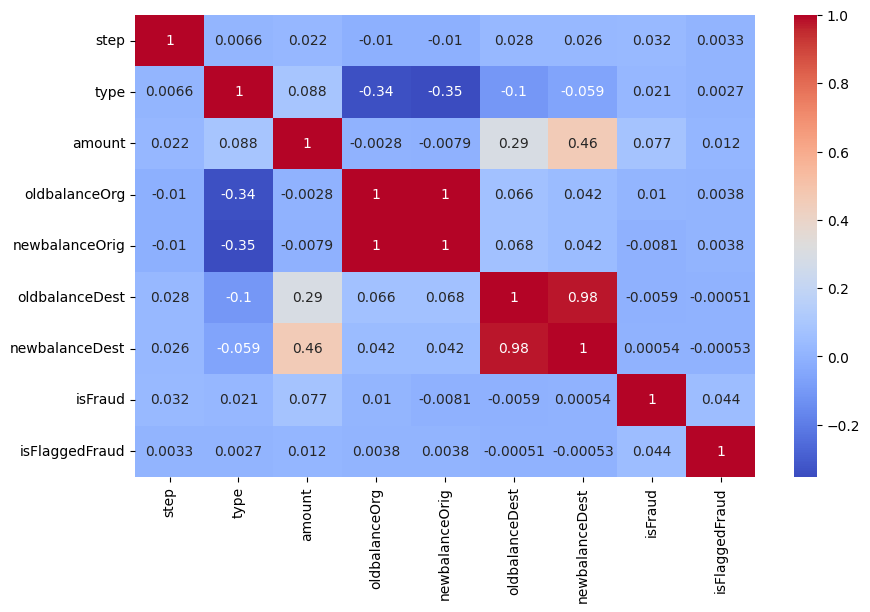

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [17]:
threshold = 0.7

correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            col_i = correlation_matrix.columns[i]
            col_j = correlation_matrix.columns[j]
            correlated_features.append((col_i, col_j, correlation_matrix.iloc[i, j]))


In [18]:
correlated_features

[('newbalanceOrig', 'oldbalanceOrg', 0.9988027631723787),
 ('newbalanceDest', 'oldbalanceDest', 0.9765685054474923)]

In [19]:
# Splitting the dataset
X = data.drop('isFraud', axis=1)  # Features
y = data['isFraud']  # Target variable

In [20]:
categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# CatBoost
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)

# Model evaluation
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred)
    return accuracy, precision, recall, roc_auc

lr_accuracy, lr_precision, lr_recall, lr_roc_auc = evaluate_model(lr_model, X_test, y_test)
dt_accuracy, dt_precision, dt_recall, dt_roc_auc = evaluate_model(dt_model, X_test, y_test)
xgb_accuracy, xgb_precision, xgb_recall, xgb_roc_auc = evaluate_model(xgb_model, X_test, y_test)
catboost_accuracy, catboost_precision, catboost_recall, catboost_roc_auc = evaluate_model(catboost_model, X_test, y_test)

# Print the evaluation metrics
print("Logistic Regression - Accuracy:", lr_accuracy, "Precision:", lr_precision, "Recall:", lr_recall, "ROC AUC:", lr_roc_auc)
print("Decision Tree - Accuracy:", dt_accuracy, "Precision:", dt_precision, "Recall:", dt_recall, "ROC AUC:", dt_roc_auc)
print("XGBoost - Accuracy:", xgb_accuracy, "Precision:", xgb_precision, "Recall:", xgb_recall, "ROC AUC:", xgb_roc_auc)
print("CatBoost - Accuracy:", catboost_accuracy, "Precision:", catboost_precision, "Recall:", catboost_recall, "ROC AUC:", catboost_roc_auc)


Learning rate set to 0.372343
0:	learn: 0.0486599	total: 862ms	remaining: 14m 21s
1:	learn: 0.0107768	total: 1.61s	remaining: 13m 25s
2:	learn: 0.0059246	total: 2.35s	remaining: 13m 1s
3:	learn: 0.0030341	total: 3.06s	remaining: 12m 42s
4:	learn: 0.0023608	total: 3.75s	remaining: 12m 26s
5:	learn: 0.0021535	total: 4.46s	remaining: 12m 19s
6:	learn: 0.0019307	total: 5.18s	remaining: 12m 14s
7:	learn: 0.0017940	total: 5.89s	remaining: 12m 10s
8:	learn: 0.0017441	total: 6.96s	remaining: 12m 45s
9:	learn: 0.0016906	total: 8.23s	remaining: 13m 35s
10:	learn: 0.0016491	total: 9.05s	remaining: 13m 33s
11:	learn: 0.0015868	total: 9.75s	remaining: 13m 22s
12:	learn: 0.0015318	total: 10.5s	remaining: 13m 14s
13:	learn: 0.0015003	total: 11.2s	remaining: 13m 8s
14:	learn: 0.0014719	total: 11.9s	remaining: 13m 3s
15:	learn: 0.0014319	total: 12.6s	remaining: 12m 57s
16:	learn: 0.0013731	total: 13.4s	remaining: 12m 53s
17:	learn: 0.0013536	total: 14.1s	remaining: 12m 50s
18:	learn: 0.0013395	total: 1

# Final Pipeline



**`More:`**
* This pipeline includes a preprocessor step using ColumnTransformer to apply standardization to numerical features and preserve categorical features
* It then applies feature selection using SelectKBest with ANOVA F-value as the scoring function to select the top 7 features
* Finally, it trains logistic regression, decision tree, XGBoost, and CatBoost classifiers using the selected features

**`More`**
* Evaluation function evaluate_pipeline calculates accuracy, precision, recall, and ROC AUC scores for the pipeline's predictions on the test set
* It returns these evaluation metrics, which are then printed for each pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [ ]:
# Load your data into X and y variables
data_url = "https://drive.google.com/uc?export=download&confirm=6gh6&id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV" #taking dataset directly from given link
df = pd.read_csv(data_url)

In [ ]:
df_encoded = df.copy()

In [ ]:

X = df_encoded.drop(columns=["isFraud"])
y = df_encoded["isFraud"]

In [ ]:

categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [ ]:
# Split the data in to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=108)

In [ ]:
numerical_features = [	'amount','oldbalanceOrg' , 	'newbalanceOrig' ,	'oldbalanceDest',	'newbalanceDest']
categorical_features = ['step','type']

In [ ]:


# Define the pipeline steps
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), numerical_features),  # Apply standardization to numerical features
        ('categorical', 'passthrough', categorical_features),  # Preserve categorical features
    ]
)

feature_selector = SelectKBest(score_func=f_classif, k=7)  # Select top 7 features using ANOVA F-value

lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
xgb_model = XGBClassifier()
catboost_model = CatBoostClassifier()

# Build the pipeline
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', feature_selector),
    ('classifier', lr_model)
])

pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', feature_selector),
    ('classifier', dt_model)
])

pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', feature_selector),
    ('classifier', xgb_model)
])

pipeline_catboost = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', feature_selector),
    ('classifier', catboost_model)
])

# Fit the pipelines
pipeline_lr.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)
pipeline_xgb.fit(X_train, y_train)
pipeline_catboost.fit(X_train, y_train)

# Evaluate the pipelines
def evaluate_pipeline(pipeline, X, y):
    y_pred = pipeline.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_pred)
    return accuracy, precision, recall, roc_auc

lr_accuracy, lr_precision, lr_recall, lr_roc_auc = evaluate_pipeline(pipeline_lr, X_test, y_test)
dt_accuracy, dt_precision, dt_recall, dt_roc_auc = evaluate_pipeline(pipeline_dt, X_test, y_test)
xgb_accuracy, xgb_precision, xgb_recall, xgb_roc_auc = evaluate_pipeline(pipeline_xgb, X_test, y_test)
catboost_accuracy, catboost_precision, catboost_recall, catboost_roc_auc = evaluate_pipeline(pipeline_catboost, X_test, y_test)

# Print the evaluation metrics for the pipelines
print("Logistic Regression - Accuracy:", lr_accuracy, "Precision:", lr_precision, "Recall:", lr_recall, "ROC AUC:", lr_roc_auc)
print("Decision Tree - Accuracy:", dt_accuracy, "Precision:", dt_precision, "Recall:", dt_recall, "ROC AUC:", dt_roc_auc)
print("XGBoost - Accuracy:", xgb_accuracy, "Precision:", xgb_precision, "Recall:", xgb_recall, "ROC AUC:", xgb_roc_auc)
print("CatBoost - Accuracy:", catboost_accuracy, "Precision:", catboost_precision, "Recall:", catboost_recall, "ROC AUC:", catboost_roc_auc)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Learning rate set to 0.39419
0:	learn: 0.0458535	total: 721ms	remaining: 12m
1:	learn: 0.0248744	total: 1.33s	remaining: 11m 3s
2:	learn: 0.0090779	total: 2.11s	remaining: 11m 42s
3:	learn: 0.0052031	total: 3.19s	remaining: 13m 14s
4:	learn: 0.0039334	total: 3.97s	remaining: 13m 9s
5:	learn: 0.0029992	total: 4.58s	remaining: 12m 38s
6:	learn: 0.0026099	total: 5.26s	remaining: 12m 25s
7:	learn: 0.0024487	total: 5.93s	remaining: 12m 15s
8:	learn: 0.0023558	total: 6.51s	remaining: 11m 57s
9:	learn: 0.0021690	total: 7.2s	remaining: 11m 52s
10:	learn: 0.0020878	total: 7.87s	remaining: 11m 47s
11:	learn: 0.0020613	total: 8.47s	remaining: 11m 37s
12:	learn: 0.0020390	total: 9.02s	remaining: 11m 24s
13:	learn: 0.0020002	total: 9.61s	remaining: 11m 16s
14:	learn: 0.0019091	total: 10.3s	remaining: 11m 16s
15:	learn: 0.0018672	total: 11s	remaining: 11m 16s
16:	learn: 0.0018558	total: 11.6s	remaining: 11m 8s
17:	learn: 0.0018338	total: 12.2s	remaining: 11m 3s
18:	learn: 0.0018283	total: 12.7s	rema

# Model performance
Logistic Regression - Accuracy: 0.9988644614954217 Precision: 0.968609865470852 Recall: 0.13059250302297462 ROC AUC: 0.565293497492587

Decision Tree - Accuracy: 0.9996660180868887 Precision: 0.8819142324425109 Recall: 0.8579201934703748 ROC AUC: 0.9288853447936041

XGBoost - Accuracy: 0.9997925382939732 Precision: 0.973433242506812 Recall: 0.8639661426844014 ROC AUC: 0.9319677275226126

CatBoost - Accuracy: 0.9996927366399376 Precision: 0.9688195991091314 Recall: 0.7889963724304716 ROC AUC: 0.8944816621018331